## Support Vector Regressor Implementation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 0.64502574, -0.72078267],
       [-0.18021164,  0.30374211],
       [ 0.88539926,  1.0648071 ],
       ...,
       [-0.32179124, -0.34750579],
       [-0.05088742,  0.16986465],
       [-0.72929736, -0.1158602 ]])

In [5]:
y

array([-1.08303224e+00,  6.19629554e+00,  4.52702063e+01, -5.22806356e+00,
       -2.27153085e+01, -3.57555976e+01,  3.08647994e+00,  8.30903564e+00,
        5.95024939e+00,  6.50487394e+00,  3.82294839e+01, -6.32890294e+01,
       -4.30372450e+00, -4.18159874e+01,  6.89891208e+01,  1.40544074e+01,
       -1.55281337e+01,  4.24050770e+01, -1.69201002e+01, -4.67018044e+01,
       -3.20302441e+01, -2.40372774e+01,  3.52719751e+01, -3.65182804e+01,
       -1.49871321e+01, -2.55885074e+00, -2.93954428e+00,  2.07721328e+01,
        3.05217845e+01,  3.38986308e+01,  3.14676268e+01, -1.71763089e+01,
       -5.04699355e+00,  2.22090730e+01, -5.01658516e+00, -8.79115841e+00,
        1.99234184e+01,  3.08167644e+01, -2.25653146e+01,  3.90315710e+01,
       -3.44182911e+01,  3.44187850e+01,  7.68261423e+00,  5.63459451e+01,
       -6.28714467e+01, -1.27834623e+01,  2.79074884e+01,  1.03849891e+01,
       -6.45331817e+01, -2.77829066e+01,  2.08077669e+01, -2.96760254e+01,
       -2.08590129e+01, -

In [6]:
pd.DataFrame(X)[0]

0      0.645026
1     -0.180212
2      0.885399
3     -0.147148
4     -0.625128
         ...   
995   -0.116450
996    0.734050
997   -0.321791
998   -0.050887
999   -0.729297
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

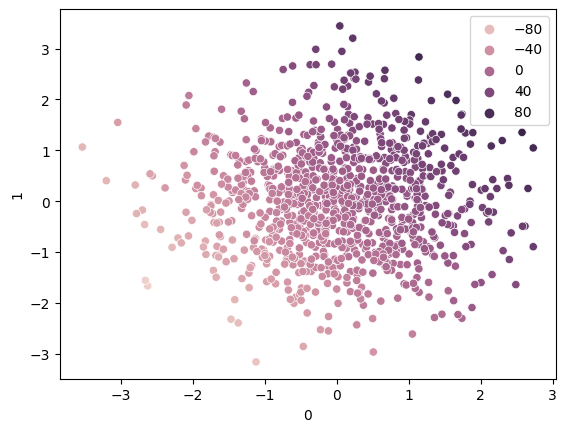

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [11]:
from sklearn.svm import SVR

In [12]:
svr=SVR(kernel='linear')

In [13]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [15]:
svr.coef_

array([[25.55430434, 18.10848731]])

In [16]:
## Prediction
y_pred=svr.predict(X_test)

In [17]:
y_pred

array([-1.47373690e+01, -3.50266971e+01,  1.88993142e+01, -5.01618573e+00,
        2.51063425e+01,  6.12363893e+01, -3.13490036e+01,  2.76793443e+01,
       -6.51995441e+01, -8.61178420e+01,  4.17751060e+01, -2.10259299e+01,
       -5.41123094e+01,  8.23768046e+00, -4.90674406e+01, -4.73186019e+00,
        4.86341318e+00,  4.03413855e+01,  5.17858029e+00, -4.99153563e+01,
       -3.65093558e+01, -1.26775357e+01, -2.58368585e+01, -3.90812045e+01,
       -3.30492306e+01, -1.68876813e+01, -5.37210663e+01, -4.94191513e+01,
       -6.55498505e+00,  8.03962073e+01,  3.80271385e+01,  5.04112319e+01,
        2.56935532e+01, -4.98408209e+00, -3.04052734e+01,  5.39141133e+01,
       -1.00830692e+01,  4.12729306e+01,  1.03439420e+01, -4.56622911e+01,
       -2.35004241e+01,  4.10910536e+01, -4.37150987e+00, -6.15984316e+00,
       -3.05703713e+01, -1.36418955e-02, -1.14212727e+01,  3.22983564e+00,
        1.95538163e+01, -4.90108598e+01,  2.11789034e+01,  3.21565992e+01,
        8.02079318e+01,  

In [18]:
from sklearn.metrics import r2_score

In [19]:
print(r2_score(y_test,y_pred))

0.9911719234295014


## Hyperparametere Tuning With SVR

In [20]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [21]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [22]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.989 total time=   0.1s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.989 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [23]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [24]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9911553258745552
